# Analyzing Trace Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MemoryAutoScaling import analysis

In [2]:
import os
pd.set_option('display.max_columns', None)

data_dir = "/Users/mattb/Desktop/Courses/MemoryAutoScaling/output_data"
stats_df = pd.read_csv(os.path.join(data_dir, "trace_stats.csv"))
stats_df.head()

,id,adf_p_val,adf_p_val_diff,adf_p_val_diff2,corr_average_usage.memory,corr_average_usage.cpus,corr_maximum_usage.memory,corr_maximum_usage.cpus,causal_average_usage.memory_ssr_ftest_1,causal_average_usage.memory_ssr_chi2test_1,causal_average_usage.memory_lrtest_1,causal_average_usage.memory_params_ftest_1,causal_average_usage.memory_ssr_ftest_2,causal_average_usage.memory_ssr_chi2test_2,causal_average_usage.memory_lrtest_2,causal_average_usage.memory_params_ftest_2,causal_average_usage.memory_ssr_ftest_3,causal_average_usage.memory_ssr_chi2test_3,causal_average_usage.memory_lrtest_3,causal_average_usage.memory_params_ftest_3,causal_maximum_usage.cpus_ssr_ftest_1,causal_maximum_usage.cpus_ssr_chi2test_1,causal_maximum_usage.cpus_lrtest_1,causal_maximum_usage.cpus_params_ftest_1,causal_maximum_usage.cpus_ssr_ftest_2,causal_maximum_usage.cpus_ssr_chi2test_2,causal_maximum_usage.cpus_lrtest_2,causal_maximum_usage.cpus_params_ftest_2,causal_maximum_usage.cpus_ssr_ftest_3,causal_maximum_usage.cpus_ssr_chi2test_3,causal_maximum_usage.cpus_lrtest_3,causal_maximum_usage.cpus_params_ftest_3,causal_average_usage.cpus_ssr_ftest_1,causal_average_usage.cpus_ssr_chi2test_1,causal_average_usage.cpus_lrtest_1,causal_average_usage.cpus_params_ftest_1,causal_average_usage.cpus_ssr_ftest_2,causal_average_usage.cpus_ssr_chi2test_2,causal_average_usage.cpus_lrtest_2,causal_average_usage.cpus_params_ftest_2,causal_average_usage.cpus_ssr_ftest_3,causal_average_usage.cpus_ssr_chi2test_3,causal_average_usage.cpus_lrtest_3,causal_average_usage.cpus_params_ftest_3
0,379419316318,0.079486,9.872467e-07,8.077765e-08,0.940495,0.074342,1.0,0.129750,0.775297,0.734096,0.734708,0.775297,0.851732,0.739167,0.745113,0.851732,0.545026,0.033895,0.100168,0.545026,0.776585,0.735610,0.736211,0.776585,0.723270,0.534082,0.552142,0.723270,0.104773,3.175140e-11,0.000395,0.104773,0.810305,0.775312,0.775682,0.810305,0.745537,0.568025,0.583705,0.745537,0.273442,0.000085,0.009488,0.273442
1,383428192808,0.123428,6.155476e-02,2.781061e-09,0.964092,0.890375,1.0,0.830718,0.461023,0.429385,0.431845,0.461023,0.429956,0.344309,0.357877,0.429956,0.093530,0.019316,0.037674,0.093530,0.529251,0.500644,0.502306,0.529251,0.208611,0.129493,0.148377,0.208611,0.068600,1.068393e-02,0.024754,0.068600,0.429177,0.396323,0.399220,0.429177,0.039285,0.010556,0.019437,0.039285,0.006240,0.000054,0.000980,0.006240
2,397087868975,0.837040,7.652065e-01,1.557217e-09,0.973138,0.642860,1.0,0.670886,0.244300,0.193554,0.202290,0.244300,0.192431,0.085651,0.111096,0.192431,0.188628,0.030956,0.063357,0.188628,0.125820,0.082924,0.093680,0.125820,0.269143,0.147713,0.173771,0.269143,0.456428,2.200626e-01,0.264803,0.456428,0.110095,0.069471,0.080186,0.110095,0.283191,0.160103,0.185969,0.283191,0.557657,0.329689,0.368347,0.557657
3,380456795160,0.198775,8.887323e-03,9.230069e-02,0.923863,0.421266,1.0,0.285020,0.294665,0.234224,0.243164,0.294665,0.109321,0.022542,0.043467,0.109321,0.019285,0.000002,0.000771,0.019285,0.328194,0.268229,0.276169,0.328194,0.410061,0.256269,0.282836,0.410061,0.590922,3.106305e-01,0.357492,0.590922,0.341509,0.281880,0.289428,0.341509,0.664549,0.549313,0.560505,0.664549,0.784290,0.590570,0.613330,0.784290
4,380756690179,0.000165,1.407748e-04,8.512649e-05,0.959992,0.715307,1.0,0.815233,0.563297,0.539111,0.540299,0.563297,0.395829,0.318116,0.331211,0.395829,0.474736,0.337501,0.362205,0.474736,0.828086,0.817950,0.818024,0.828086,0.528976,0.459241,0.468005,0.528976,0.056724,9.982231e-03,0.022035,0.056724,0.273982,0.241473,0.246439,0.273982,0.152973,0.089971,0.106613,0.152973,0.051788,0.008449,0.019564,0.051788


In [3]:
print("Total Trace Count: {}".format(len(stats_df)))

Total Trace Count: 2701


In [4]:
print("Stationarity Results")
print("Number of Stationary Traces: {}".format(len(stats_df[stats_df['adf_p_val'] < 0.05])))
print("Number of Stationary Traces after 1 Level Differencing: {}".format(len(
    stats_df[(stats_df['adf_p_val_diff'] < 0.05) & (stats_df['adf_p_val'] >= 0.05)])))
print("Number of Stationary Traces after 2 Level Differencing: {}".format(len(
    stats_df[(stats_df['adf_p_val_diff2'] < 0.05) & (stats_df['adf_p_val_diff'] >= 0.05) & (stats_df['adf_p_val'] >= 0.05)])))
print("Other: {}".format(len(
    stats_df[(stats_df['adf_p_val_diff2'] >= 0.05) & (stats_df['adf_p_val_diff'] >= 0.05) & (stats_df['adf_p_val'] >= 0.05)])))

Stationarity Results
Number of Stationary Traces: 1012
Number of Stationary Traces after 1 Level Differencing: 1366
Number of Stationary Traces after 2 Level Differencing: 181
Other: 142


In [5]:
print("Correlation Results")
print("Number of traces with correlation of maximum_usage.memory and average_usage.memory >= 0.7 or <= -0.7: {}".format(len(stats_df[stats_df['corr_average_usage.memory'].abs() > 0.7])))
print("Number of traces with correlation of maximum_usage.memory and average_usage.cpus >= 0.7 or <= -0.7: {}".format(len(stats_df[stats_df['corr_average_usage.cpus'].abs() > 0.7])))
print("Number of traces with correlation of maximum_usage.memory and maximum_usage.cpus >= 0.7 or <= -0.7: {}".format(len(stats_df[stats_df['corr_maximum_usage.cpus'].abs() > 0.7])))

Correlation Results
Number of traces with correlation of maximum_usage.memory and average_usage.memory >= 0.7 or <= -0.7: 2694
Number of traces with correlation of maximum_usage.memory and average_usage.cpus >= 0.7 or <= -0.7: 788
Number of traces with correlation of maximum_usage.memory and maximum_usage.cpus >= 0.7 or <= -0.7: 912


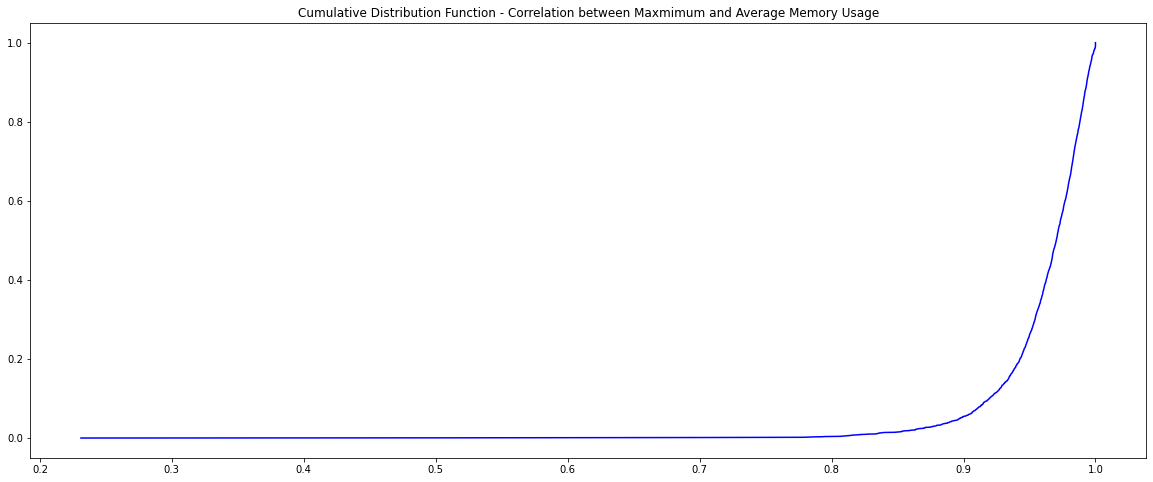

In [6]:
analysis.plot_cumulative_distribution_function(
    stats_df['corr_average_usage.memory'].abs().values, "Correlation between Maxmimum and Average Memory Usage")

In [6]:
reg_df = pd.read_csv(os.path.join(data_dir, "reg_results.csv"))
description_df = reg_df.describe()
description_df

,id,train_mse,test_mse
count,3.225000e+03,3.225000e+03,3.225000e+03
mean,3.801429e+11,3.716650e-06,3.650189e+12
std,5.216307e+10,1.104214e-04,2.072909e+14
min,1.950000e+02,0.000000e+00,1.000226e-15
25%,3.810928e+11,2.742361e-08,1.162306e-07
50%,3.841110e+11,1.564901e-07,3.803227e-07
75%,3.957837e+11,4.434449e-07,1.196064e-06
max,4.004577e+11,5.383623e-03,1.177186e+16


It seems there are a few traces for which the regression model has a very high test MSE, so we try to isolate these traces.

In [7]:
stationary_indices = list(stats_df[stats_df['adf_p_val'] < 0.05].index)
level1_diff_indices = list(stats_df[(stats_df['adf_p_val_diff'] < 0.05) & (stats_df['adf_p_val'] >= 0.05)].index)
level2_diff_indices = list(stats_df[(stats_df['adf_p_val_diff2'] < 0.05) & (stats_df['adf_p_val_diff'] >= 0.05) & (stats_df['adf_p_val'] >= 0.05)].index)
other_indices = list(stats_df[(stats_df['adf_p_val_diff2'] >= 0.05) & (stats_df['adf_p_val_diff'] >= 0.05) & (stats_df['adf_p_val'] >= 0.05)].index)

In [8]:
reg_df.iloc[stationary_indices].describe()

,id,train_mse,test_mse
count,1.012000e+03,1.012000e+03,1.012000e+03
mean,3.830375e+11,6.408325e-06,1.163227e+13
std,4.143426e+10,1.700988e-04,3.700452e+14
min,3.590000e+02,0.000000e+00,1.000226e-15
25%,3.812614e+11,2.755980e-08,1.109025e-07
50%,3.841971e+11,1.616299e-07,3.902972e-07
75%,3.961716e+11,4.186691e-07,1.110152e-06
max,4.004577e+11,5.383623e-03,1.177186e+16


In [9]:
reg_df.iloc[level1_diff_indices].describe()

,id,train_mse,test_mse
count,1.366000e+03,1.366000e+03,1.366000e+03
mean,3.784906e+11,3.382435e-06,1.602783e-05
std,5.783810e+10,8.564598e-05,2.982197e-04
min,1.950000e+02,1.657241e-15,1.587997e-13
25%,3.810192e+11,2.562651e-08,1.176149e-07
50%,3.839619e+11,1.619701e-07,3.750899e-07
75%,3.960119e+11,4.332811e-07,1.221582e-06
max,4.004425e+11,3.146708e-03,1.044993e-02


In [10]:
reg_df.iloc[level2_diff_indices].describe()

,id,train_mse,test_mse
count,1.810000e+02,1.810000e+02,1.810000e+02
mean,3.824303e+11,1.024516e-06,7.080238e-06
std,4.213597e+10,6.837295e-06,3.783899e-05
min,4.803100e+04,9.093728e-12,9.319952e-11
25%,3.811098e+11,3.325632e-08,1.126292e-07
50%,3.840103e+11,1.387053e-07,3.409666e-07
75%,3.962977e+11,4.940842e-07,1.493178e-06
max,4.003653e+11,9.129055e-05,3.576360e-04


In [11]:
reg_df.iloc[other_indices].describe()

,id,train_mse,test_mse
count,1.420000e+02,1.420000e+02,1.420000e+02
mean,3.818501e+11,1.145806e-06,1.222483e-05
std,4.649631e+10,4.637088e-06,8.929200e-05
min,3.324000e+04,8.535736e-19,2.050090e-10
25%,3.816412e+11,3.033773e-08,1.282973e-07
50%,3.844862e+11,1.582397e-07,4.302511e-07
75%,3.952550e+11,4.758198e-07,1.474614e-06
max,4.004161e+11,4.677349e-05,1.046660e-03


In [12]:
ma_df = pd.read_csv(os.path.join(data_dir, "ma_results.csv"))
ma_df.describe()

,id,train_mse_ma_1,test_mse_ma_1,train_mse_ma_3,test_mse_ma_3,train_mse_ma_5,test_mse_ma_5,train_mse_ma_7,test_mse_ma_7,train_mse_ma_10,test_mse_ma_10
count,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03
mean,3.801429e+11,6.404667e-06,4.076754e-06,5.427218e-06,4.388770e-06,5.211047e-06,4.424911e-06,5.163996e-06,4.605752e-06,5.082204e-06,4.787108e-06
std,5.216307e+10,1.670415e-04,5.430620e-05,1.242975e-04,7.067601e-05,1.171658e-04,7.690532e-05,1.146123e-04,8.241392e-05,1.111583e-04,9.071183e-05
min,1.950000e+02,6.496391e-14,0.000000e+00,6.496391e-14,0.000000e+00,6.496391e-14,3.738930e-16,6.496391e-14,3.560886e-16,6.496391e-14,3.427352e-16
25%,3.810928e+11,1.173775e-07,6.820481e-08,1.034851e-07,5.904483e-08,9.966440e-08,5.777998e-08,1.004315e-07,6.226881e-08,1.001754e-07,6.487653e-08
50%,3.841110e+11,3.731019e-07,2.519187e-07,3.040218e-07,2.049114e-07,2.964454e-07,1.972748e-07,2.938899e-07,2.036298e-07,2.940616e-07,2.128862e-07
75%,3.957837e+11,8.892030e-07,7.657499e-07,8.286224e-07,6.750071e-07,8.966522e-07,6.555838e-07,9.456977e-07,6.637283e-07,1.005460e-06,6.747477e-07
max,4.004577e+11,8.153464e-03,1.800688e-03,5.766536e-03,2.709980e-03,5.329950e-03,2.980593e-03,5.172013e-03,3.186324e-03,4.996153e-03,3.707840e-03


From these we see that the MA model doesn't have any particular traces that perform especially poorly

In [14]:
ma_df.iloc[stationary_indices].describe()

,id,train_mse_ma_1,test_mse_ma_1,train_mse_ma_3,test_mse_ma_3,train_mse_ma_5,test_mse_ma_5,train_mse_ma_7,test_mse_ma_7,train_mse_ma_10,test_mse_ma_10
count,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03
mean,3.799294e+11,9.769003e-06,3.443292e-06,7.159775e-06,2.658018e-06,6.727829e-06,2.529436e-06,6.599565e-06,2.514907e-06,6.455136e-06,2.458070e-06
std,5.280435e+10,2.567629e-04,4.959090e-05,1.814686e-04,3.200567e-05,1.677317e-04,2.914120e-05,1.627650e-04,2.787131e-05,1.572348e-04,2.717550e-05
min,5.300000e+02,1.384014e-13,4.092726e-12,9.885812e-14,1.374348e-11,9.094947e-14,1.440640e-11,8.756005e-14,3.004249e-11,8.161668e-14,2.689506e-11
25%,3.810460e+11,1.202056e-07,6.641107e-08,1.052197e-07,5.711938e-08,9.994773e-08,5.700366e-08,9.905763e-08,5.818307e-08,9.896033e-08,6.029639e-08
50%,3.838752e+11,3.384207e-07,2.303730e-07,2.748098e-07,1.932455e-07,2.644152e-07,1.897501e-07,2.640966e-07,1.893261e-07,2.703478e-07,2.003366e-07
75%,3.959592e+11,8.246146e-07,7.088679e-07,8.145311e-07,6.651201e-07,8.620485e-07,6.518421e-07,9.070573e-07,6.627437e-07,9.374781e-07,6.740779e-07
max,4.004154e+11,8.153464e-03,1.482069e-03,5.766536e-03,9.591252e-04,5.329950e-03,8.705267e-04,5.172013e-03,8.278330e-04,4.996153e-03,8.135434e-04


In [15]:
ma_df.iloc[level1_diff_indices].describe()

,id,train_mse_ma_1,test_mse_ma_1,train_mse_ma_3,test_mse_ma_3,train_mse_ma_5,test_mse_ma_5,train_mse_ma_7,test_mse_ma_7,train_mse_ma_10,test_mse_ma_10
count,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03
mean,3.811280e+11,6.233744e-06,5.054307e-06,5.597048e-06,6.048329e-06,5.188988e-06,5.732127e-06,5.088666e-06,5.767605e-06,5.095005e-06,5.868174e-06
std,4.851576e+10,1.280359e-04,6.487603e-05,1.015310e-04,9.130953e-05,9.467097e-05,9.047746e-05,9.211581e-05,8.953143e-05,9.150799e-05,9.384942e-05
min,1.950000e+02,6.496391e-14,6.231550e-16,6.496391e-14,4.154367e-16,6.496391e-14,3.738930e-16,6.496391e-14,3.560886e-16,6.496391e-14,3.427352e-16
25%,3.811507e+11,1.171012e-07,7.078299e-08,1.020650e-07,6.403946e-08,9.952027e-08,6.214965e-08,9.968017e-08,6.486785e-08,9.920510e-08,6.828348e-08
50%,3.842231e+11,3.811065e-07,2.639938e-07,3.215039e-07,2.109655e-07,3.109649e-07,2.029725e-07,3.082735e-07,2.096360e-07,3.091896e-07,2.180917e-07
75%,3.957703e+11,9.316475e-07,7.680264e-07,8.456120e-07,6.515767e-07,8.970284e-07,6.296277e-07,9.444061e-07,6.370343e-07,1.007107e-06,6.478181e-07
max,4.004577e+11,4.549971e-03,1.800688e-03,3.335686e-03,2.709980e-03,3.152586e-03,2.980593e-03,3.094039e-03,2.933932e-03,3.070333e-03,3.123472e-03


In [16]:
ma_df.iloc[level2_diff_indices].describe()

,id,train_mse_ma_1,test_mse_ma_1,train_mse_ma_3,test_mse_ma_3,train_mse_ma_5,test_mse_ma_5,train_mse_ma_7,test_mse_ma_7,train_mse_ma_10,test_mse_ma_10
count,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02
mean,3.807091e+11,6.515764e-06,7.406859e-06,9.665621e-06,1.164225e-05,1.143764e-05,1.566185e-05,1.201987e-05,1.867443e-05,1.120914e-05,2.157114e-05
std,5.017140e+10,6.999716e-05,8.204920e-05,1.158696e-04,1.420779e-04,1.404667e-04,1.967848e-04,1.482062e-04,2.367787e-04,1.371092e-04,2.755407e-04
min,2.770000e+02,5.723250e-10,4.037247e-10,7.806213e-10,2.438456e-10,9.296849e-10,2.529487e-10,1.011530e-09,6.952809e-10,1.118298e-09,4.722991e-10
25%,3.813689e+11,9.545533e-08,5.051853e-08,8.392019e-08,4.243782e-08,7.919091e-08,4.333362e-08,8.270323e-08,4.530060e-08,8.256244e-08,4.301015e-08
50%,3.842139e+11,3.757214e-07,1.905470e-07,2.950157e-07,1.735923e-07,2.739726e-07,1.802869e-07,2.707877e-07,1.853482e-07,2.707609e-07,1.924595e-07
75%,3.962435e+11,8.933722e-07,7.358299e-07,8.489266e-07,6.670906e-07,9.048127e-07,7.142841e-07,9.498807e-07,7.041183e-07,9.663674e-07,6.736723e-07
max,4.004156e+11,9.417927e-04,1.103843e-03,1.559494e-03,1.912094e-03,1.890490e-03,2.648233e-03,1.994644e-03,3.186324e-03,1.845348e-03,3.707840e-03


In [17]:
ma_df.iloc[other_indices].describe()

,id,train_mse_ma_1,test_mse_ma_1,train_mse_ma_3,test_mse_ma_3,train_mse_ma_5,test_mse_ma_5,train_mse_ma_7,test_mse_ma_7,train_mse_ma_10,test_mse_ma_10
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,3.801399e+11,9.215922e-07,1.287181e-06,7.995587e-07,9.990761e-07,8.080490e-07,9.176601e-07,8.379819e-07,9.384421e-07,8.679598e-07,8.920558e-07
std,5.658028e+10,1.840645e-06,3.695922e-06,1.566573e-06,2.787299e-06,1.691416e-06,2.423625e-06,1.790868e-06,2.487492e-06,1.792004e-06,2.246080e-06
min,3.209600e+04,3.806635e-09,1.544504e-09,2.156251e-09,1.154230e-09,1.844835e-09,1.092245e-09,1.726806e-09,8.535404e-10,1.643820e-09,8.791412e-10
25%,3.819548e+11,1.165024e-07,7.448829e-08,1.150876e-07,6.191299e-08,9.952061e-08,5.972914e-08,1.003825e-07,7.385406e-08,1.000819e-07,6.519893e-08
50%,3.845008e+11,3.933337e-07,2.576964e-07,3.069203e-07,1.873873e-07,2.908661e-07,1.838542e-07,2.881973e-07,1.841371e-07,2.867518e-07,2.078681e-07
75%,3.960285e+11,7.861319e-07,9.133728e-07,7.479915e-07,7.723379e-07,7.749884e-07,7.179879e-07,8.780819e-07,7.272030e-07,9.383816e-07,7.398771e-07
max,4.003772e+11,1.330716e-05,3.204761e-05,1.046902e-05,2.116167e-05,1.452828e-05,1.894896e-05,1.636586e-05,1.806181e-05,1.636586e-05,1.738392e-05


The results seem to be pretty evenly distributed across the different categories of traces.

In [19]:
es_df = pd.read_csv(os.path.join(data_dir, "es_results.csv"))
es_df.describe()

,id,train_mse_es_0.1,test_mse_es_0.1,train_mse_es_0.3,test_mse_es_0.3,train_mse_es_0.5,test_mse_es_0.5,train_mse_es_0.7,test_mse_es_0.7,train_mse_es_0.9,test_mse_es_0.9
count,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03,3.225000e+03
mean,3.801429e+11,2.228054e-05,2.190580e-05,2.228054e-05,2.190580e-05,2.228054e-05,2.190580e-05,2.228054e-05,2.190580e-05,2.228054e-05,2.190580e-05
std,5.216307e+10,4.151324e-04,3.221025e-04,4.151324e-04,3.221025e-04,4.151324e-04,3.221025e-04,4.151324e-04,3.221025e-04,4.151324e-04,3.221025e-04
min,1.950000e+02,6.821210e-13,8.011993e-16,6.821210e-13,8.011993e-16,6.821210e-13,8.011993e-16,6.821210e-13,8.011993e-16,6.821210e-13,8.011993e-16
25%,3.810928e+11,5.372201e-07,4.740634e-07,5.372201e-07,4.740634e-07,5.372201e-07,4.740634e-07,5.372201e-07,4.740634e-07,5.372201e-07,4.740634e-07
50%,3.841110e+11,2.064915e-06,1.345899e-06,2.064915e-06,1.345899e-06,2.064915e-06,1.345899e-06,2.064915e-06,1.345899e-06,2.064915e-06,1.345899e-06
75%,3.957837e+11,6.287984e-06,3.164196e-06,6.287984e-06,3.164196e-06,6.287984e-06,3.164196e-06,6.287984e-06,3.164196e-06,6.287984e-06,3.164196e-06
max,4.004577e+11,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02


In [20]:
es_df.iloc[stationary_indices].describe()

,id,train_mse_es_0.1,test_mse_es_0.1,train_mse_es_0.3,test_mse_es_0.3,train_mse_es_0.5,test_mse_es_0.5,train_mse_es_0.7,test_mse_es_0.7,train_mse_es_0.9,test_mse_es_0.9
count,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03,1.012000e+03
mean,3.784938e+11,2.903608e-05,2.969408e-05,2.903608e-05,2.969408e-05,2.903608e-05,2.969408e-05,2.903608e-05,2.969408e-05,2.903608e-05,2.969408e-05
std,5.693590e+10,6.007301e-04,4.729165e-04,6.007301e-04,4.729165e-04,6.007301e-04,4.729165e-04,6.007301e-04,4.729165e-04,6.007301e-04,4.729165e-04
min,1.950000e+02,8.445308e-13,9.598576e-13,8.445308e-13,9.598576e-13,8.445308e-13,9.598576e-13,8.445308e-13,9.598576e-13,8.445308e-13,9.598576e-13
25%,3.811911e+11,4.902798e-07,4.505166e-07,4.902798e-07,4.505166e-07,4.902798e-07,4.505166e-07,4.902798e-07,4.505166e-07,4.902798e-07,4.505166e-07
50%,3.838699e+11,1.775706e-06,1.265587e-06,1.775706e-06,1.265587e-06,1.775706e-06,1.265587e-06,1.775706e-06,1.265587e-06,1.775706e-06,1.265587e-06
75%,3.953127e+11,5.683662e-06,3.158893e-06,5.683662e-06,3.158893e-06,5.683662e-06,3.158893e-06,5.683662e-06,3.158893e-06,5.683662e-06,3.158893e-06
max,4.004392e+11,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02,1.904487e-02,1.317109e-02


In [21]:
es_df.iloc[level1_diff_indices].describe()

,id,train_mse_es_0.1,test_mse_es_0.1,train_mse_es_0.3,test_mse_es_0.3,train_mse_es_0.5,test_mse_es_0.5,train_mse_es_0.7,test_mse_es_0.7,train_mse_es_0.9,test_mse_es_0.9
count,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03
mean,3.812113e+11,2.401548e-05,2.067960e-05,2.401548e-05,2.067960e-05,2.401548e-05,2.067960e-05,2.401548e-05,2.067960e-05,2.401548e-05,2.067960e-05
std,4.921756e+10,3.710365e-04,2.726023e-04,3.710365e-04,2.726023e-04,3.710365e-04,2.726023e-04,3.710365e-04,2.726023e-04,3.710365e-04,2.726023e-04
min,3.590000e+02,7.772046e-13,1.430921e-12,7.772046e-13,1.430921e-12,7.772046e-13,1.430921e-12,7.772046e-13,1.430921e-12,7.772046e-13,1.430921e-12
25%,3.810629e+11,5.451862e-07,4.714864e-07,5.451862e-07,4.714864e-07,5.451862e-07,4.714864e-07,5.451862e-07,4.714864e-07,5.451862e-07,4.714864e-07
50%,3.842186e+11,2.182543e-06,1.400804e-06,2.182543e-06,1.400804e-06,2.182543e-06,1.400804e-06,2.182543e-06,1.400804e-06,2.182543e-06,1.400804e-06
75%,3.962007e+11,6.414329e-06,3.117660e-06,6.414329e-06,3.117660e-06,6.414329e-06,3.117660e-06,6.414329e-06,3.117660e-06,6.414329e-06,3.117660e-06
max,4.004577e+11,1.169281e-02,6.774434e-03,1.169281e-02,6.774434e-03,1.169281e-02,6.774434e-03,1.169281e-02,6.774434e-03,1.169281e-02,6.774434e-03


In [22]:
es_df.iloc[level2_diff_indices].describe()

,id,train_mse_es_0.1,test_mse_es_0.1,train_mse_es_0.3,test_mse_es_0.3,train_mse_es_0.5,test_mse_es_0.5,train_mse_es_0.7,test_mse_es_0.7,train_mse_es_0.9,test_mse_es_0.9
count,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02
mean,3.855455e+11,1.481334e-05,2.215940e-05,1.481334e-05,2.215940e-05,1.481334e-05,2.215940e-05,1.481334e-05,2.215940e-05,1.481334e-05,2.215940e-05
std,3.072216e+10,8.880245e-05,1.499555e-04,8.880245e-05,1.499555e-04,8.880245e-05,1.499555e-04,8.880245e-05,1.499555e-04,8.880245e-05,1.499555e-04
min,7.577000e+03,9.094947e-13,8.011993e-16,9.094947e-13,8.011993e-16,9.094947e-13,8.011993e-16,9.094947e-13,8.011993e-16,9.094947e-13,8.011993e-16
25%,3.816431e+11,4.235555e-07,4.343658e-07,4.235555e-07,4.343658e-07,4.235555e-07,4.343658e-07,4.235555e-07,4.343658e-07,4.235555e-07,4.343658e-07
50%,3.845570e+11,1.522193e-06,1.246893e-06,1.522193e-06,1.246893e-06,1.522193e-06,1.246893e-06,1.522193e-06,1.246893e-06,1.522193e-06,1.246893e-06
75%,3.967061e+11,6.066960e-06,2.880287e-06,6.066960e-06,2.880287e-06,6.066960e-06,2.880287e-06,6.066960e-06,2.880287e-06,6.066960e-06,2.880287e-06
max,4.004008e+11,1.081303e-03,1.602731e-03,1.081303e-03,1.602731e-03,1.081303e-03,1.602731e-03,1.081303e-03,1.602731e-03,1.081303e-03,1.602731e-03


In [23]:
es_df.iloc[other_indices].describe()

,id,train_mse_es_0.1,test_mse_es_0.1,train_mse_es_0.3,test_mse_es_0.3,train_mse_es_0.5,test_mse_es_0.5,train_mse_es_0.7,test_mse_es_0.7,train_mse_es_0.9,test_mse_es_0.9
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,3.833236e+11,7.031577e-06,1.142194e-05,7.031577e-06,1.142194e-05,7.031577e-06,1.142194e-05,7.031577e-06,1.142194e-05,7.031577e-06,1.142194e-05
std,3.499773e+10,3.082724e-05,7.275365e-05,3.082724e-05,7.275365e-05,3.082724e-05,7.275365e-05,3.082724e-05,7.275365e-05,3.082724e-05,7.275365e-05
min,2.947000e+03,6.821210e-13,1.605860e-08,6.821210e-13,1.605860e-08,6.821210e-13,1.605860e-08,6.821210e-13,1.605860e-08,6.821210e-13,1.605860e-08
25%,3.812857e+11,4.421171e-07,3.793683e-07,4.421171e-07,3.793683e-07,4.421171e-07,3.793683e-07,4.421171e-07,3.793683e-07,4.421171e-07,3.793683e-07
50%,3.842216e+11,2.178757e-06,1.278580e-06,2.178757e-06,1.278580e-06,2.178757e-06,1.278580e-06,2.178757e-06,1.278580e-06,2.178757e-06,1.278580e-06
75%,3.938672e+11,6.410511e-06,2.662720e-06,6.410511e-06,2.662720e-06,6.410511e-06,2.662720e-06,6.410511e-06,2.662720e-06,6.410511e-06,2.662720e-06
max,4.003185e+11,3.616773e-04,7.472541e-04,3.616773e-04,7.472541e-04,3.616773e-04,7.472541e-04,3.616773e-04,7.472541e-04,3.616773e-04,7.472541e-04
